In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-07-priority-fast-receive.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
348,68,remove,4089,0.4,0.0,zipf,0,0,sequential,NaN,851,0,64695,1804
1191,18,addremove,2391,0.2,0.0,zipf,0,3,sequential,NaN,382,0,6514,475
200,90,remove,4890,0.8,0.0,zipf,0,0,mpi_priority,8.0,335,0,63865,0
893,9,add,2000,0.8,0.0,zipf,0,1,sequential,NaN,359,0,28020,991
345,68,remove,4089,0.4,0.0,zipf,0,1,mpi_priority,8.0,346,0,13641,0


In [3]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program repetition_i                  
76                  0       mpi_priority 0               independent   
                                         1               independent   
                                         2               independent   
                                         3               independent   
                            sequential   0               independent   
...                                                              ...   
21                  0       mpi_priority 3                 addremove   
                            sequential   0                 addremove   
                                         1                 addremove   
                                         2                 addremove   
                                         3                 addremove   

                                                       input_length_1  \
generation_config_i regen_i diff_program repetition_i                   
76                  0       mpi_priority 0                       4089   
                                         1                       4089   
                                         2                       4089   
                                         3                       4089   
                            sequential   0                       4089   
...                                                               ...   
21                  0       mpi_priority 3                       2391   
                            sequential   0                       2391   
                                         1                       2391   
                                         2                       2391   
                                         3                       2391   

                                                       input_change_strength  \
generation_config_i regen_i diff_program repetition_i                          
76                  0       mpi_priority 0                               1.0   
                                         1                               1.0   
                                         2                               1.0   
                                         3                               1.0   
                            sequential   0                               1.0   
...                                                                      ...   
21                  0       mpi_priority 3                               0.4   
                            sequential   0                               0.4   
                                         1                               0.4   
                                         2                               0.4   
                                         3                               0.4   

                                                       input_chunkiness  \
generation_config_i regen_i diff_program repetition_i                     
76                  0       mpi_priority 0                          0.0   
                                         1                          0.0   
                                         2                          0.0   
                                         3                          0.0   
                            sequential   0                          0.0   
...                                                                 ...   
21                  0       mpi_priority 3                          0.0   
                            sequential   0                          0.0   
                                         1                          0.0   
                                         2                          0.0   
                                         3                          0.0   

                                                      input_distribution  \
generation_config_i regen_i diff_program repetition_i                     

In [4]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

In [5]:
indexed_benchmark_results.xs('mpi_priority', level='diff_program')

input_strategy  input_length_1  \
generation_config_i regen_i repetition_i                                  
76                  0       0               independent            4089   
                            1               independent            4089   
                            2               independent            4089   
                            3               independent            4089   
123                 0       0                 addremove            6993   
...                                                 ...             ...   
54                  0       3                       add            3419   
21                  0       0                 addremove            2391   
                            1                 addremove            2391   
                            2                 addremove            2391   
                            3                 addremove            2391   

                                          input_change_strength  \
generation_config_i regen_i repetition_i                          
76                  0       0                               1.0   
                            1                               1.0   
                            2                               1.0   
                            3                               1.0   
123                 0       0                               0.8   
...                                                         ...   
54                  0       3                               0.6   
21                  0       0                               0.4   
                            1                               0.4   
                            2                               0.4   
                            3                               0.4   

                                          input_chunkiness input_distribution  \
generation_config_i regen_i repetition_i                                        
76                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
                            2                          0.0               zipf   
                            3                          0.0               zipf   
123                 0       0                          0.0               zipf   
...                                                    ...                ...   
54                  0       3                          0.0               zipf   
21                  0       0                          0.0               zipf   
                            1                          0.0               zipf   
                            2                          0.0               zipf   
                            3                          0.0               zipf   

                                          mpi_procs  micros_input  \
generation_config_i regen_i repetition_i                            
76                  0       0                   8.0           705   
                            1                   8.0           693   
                            2                   8.0           757   
                            3                   8.0           795   
123                 0       0                   8.0           710   
...                                             ...           ...   
54                  0       3                   8.0          1272   
21                  0       0                   8.0           449   
                            1                   8.0           421   
                            2                   8.0           516   
                            3                   8.0           510   

                                          micros_precompute  micros_until_len  \
generation_config_i regen_i repetition_i                                        
76                  0       0                             0            114662  

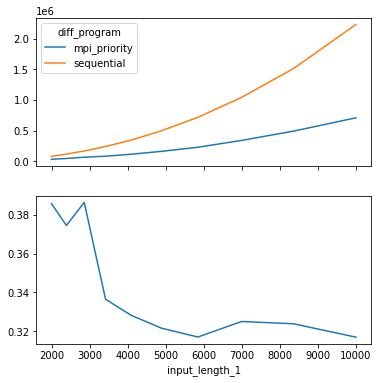

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.mpi_priority / temp.sequential).plot(ax=ax[1]);

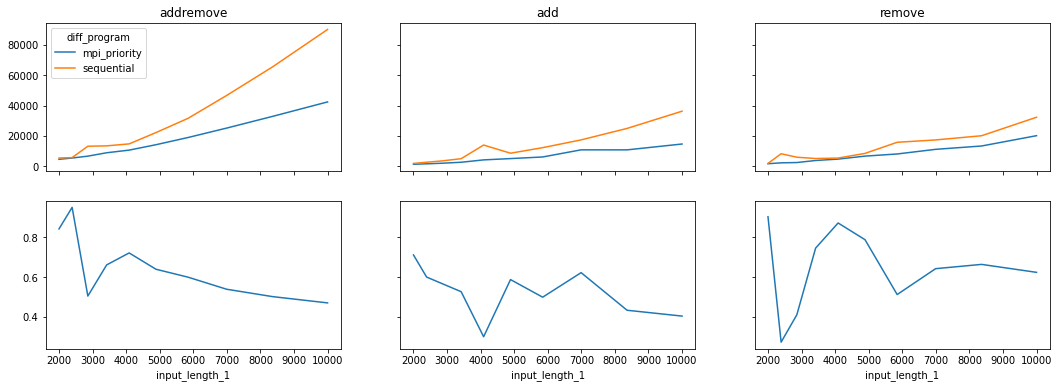

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/5) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp.mpi_priority / temp.sequential).plot(ax=ax[1][input_strategy_i]);

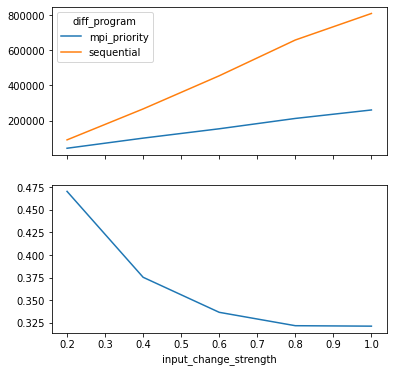

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(['mpi_priority', 'sequential'])]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp.mpi_priority / temp.sequential).plot(ax=ax[1]);

0.928125
0.940625
0.909375


,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
0,add,2000,0.2,0.0,zipf,8.0,419,0,1352,0
1,add,2000,0.2,0.0,zipf,8.0,419,0,1352,0
2,add,2000,0.2,0.0,zipf,8.0,419,0,1352,0
3,remove,2000,0.2,0.0,zipf,8.0,219,0,1781,0
4,remove,2000,0.2,0.0,zipf,8.0,219,0,1781,0
...,...,...,...,...,...,...,...,...,...,...
589,remove,10000,1.0,0.0,zipf,8.0,892,0,260104,0
590,addremove,10000,1.0,0.0,zipf,8.0,1013,0,606334,0
591,addremove,10000,1.0,0.0,zipf,8.0,1013,0,606334,0
592,addremove,10000,1.0,0.0,zipf,8.0,1013,0,606334,0


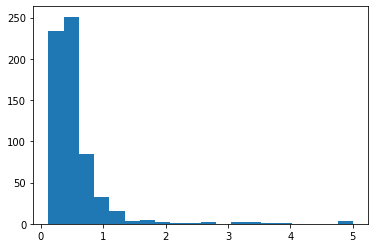

In [10]:
temp = indexed_benchmark_results['micros_until_len'].unstack('diff_program')
print((temp.mpi_priority < temp.sequential).mean())
print((temp.mpi_priority < 1.1 * temp.sequential).mean())
print((1.1 * temp.mpi_priority < temp.sequential).mean())

hist_values = temp.mpi_priority / temp.sequential
hist_values = hist_values.clip(upper=5)
plt.hist(hist_values, bins=20);

beaten_rows = []
for generation_config_i in temp[temp.mpi_priority < temp.sequential].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)